# Catboost Classifier model 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,accuracy_score, classification_report, roc_auc_score, roc_curve
import seaborn as sns

### Loading the data
This dataset is a cleaned and merged version of different datasets of the HOME CREDIT DEFAULT RISK which can be found at https://www.kaggle.com/competitions/home-credit-default-risk and is exported as reduced CSV after the data cleaning, feature selection and labelling.

In [2]:
#Loading the dataset
app_data = pd.read_csv('/Users/amarjotsinghlohia/Documents/Dissertation/Data/home-credit-default-risk/application_train_upsampled.csv')
app_data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_INCOME_TYPE_2,NAME_INCOME_TYPE_3,NAME_INCOME_TYPE_4,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,NAME_EDUCATION_TYPE_3,NAME_FAMILY_STATUS_0,NAME_FAMILY_STATUS_1,NAME_FAMILY_STATUS_2
0,1,100003,0,0,1,0,0,270000.0,1293502.5,35698.5,...,0,0,1,0,0,1,0,0,0,1
1,2,100004,0,1,0,1,1,67500.0,135000.0,6750.0,...,0,1,0,0,1,0,0,1,0,0
2,3,100007,0,0,0,0,1,121500.0,513000.0,21865.5,...,0,1,0,0,1,0,0,1,0,0
3,4,100008,0,0,0,0,1,99000.0,490495.5,27517.5,...,0,0,1,0,1,0,0,0,0,1
4,5,100009,0,0,1,1,1,171000.0,1560726.0,41301.0,...,0,1,0,0,0,1,0,0,0,1


In [3]:
app_data["TARGET"].value_counts()

0    168113
1    168113
Name: TARGET, dtype: int64

#### Splitting into training and test

In [4]:
#Splitting into train and test dataset
X = app_data.iloc[:,3:]
Y = app_data['TARGET']
print(X.shape, Y.shape)


(336226, 57) (336226,)


In [5]:
#Splitting into training and testing data into 80% and 20% respectively

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
print(X.shape, X_train.shape, X_test.shape, Y.shape, Y_train.shape, Y_test.shape)

(336226, 57) (235358, 57) (100868, 57) (336226,) (235358,) (100868,)


### Defining the Catbost classifier model


In [6]:
from catboost import CatBoostClassifier
model_cb = CatBoostClassifier(iterations=2000, eval_metric= 'AUC',
                              depth=8,
                              verbose=100)
model_cb.fit(X_train, Y_train, plot=True, eval_set=(X_test, Y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.090319
0:	test: 0.6503909	best: 0.6503909 (0)	total: 494ms	remaining: 16m 27s
100:	test: 0.7311605	best: 0.7311605 (100)	total: 23.8s	remaining: 7m 28s
200:	test: 0.7686384	best: 0.7686384 (200)	total: 42.3s	remaining: 6m 18s
300:	test: 0.7983173	best: 0.7983173 (300)	total: 59.6s	remaining: 5m 36s
400:	test: 0.8225859	best: 0.8225859 (400)	total: 1m 11s	remaining: 4m 44s
500:	test: 0.8424239	best: 0.8424239 (500)	total: 1m 22s	remaining: 4m 5s
600:	test: 0.8588969	best: 0.8588969 (600)	total: 1m 35s	remaining: 3m 42s
700:	test: 0.8732569	best: 0.8732569 (700)	total: 1m 46s	remaining: 3m 18s
800:	test: 0.8851435	best: 0.8851435 (800)	total: 1m 58s	remaining: 2m 56s
900:	test: 0.8960027	best: 0.8960027 (900)	total: 2m 8s	remaining: 2m 36s
1000:	test: 0.9056252	best: 0.9056252 (1000)	total: 2m 21s	remaining: 2m 21s
1100:	test: 0.9138201	best: 0.9138201 (1100)	total: 2m 36s	remaining: 2m 7s
1200:	test: 0.9211634	best: 0.9211634 (1200)	total: 2m 45s	remaining: 1m 49s

#### Confusion Matrix plot for Hyperprameter tuned model

/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


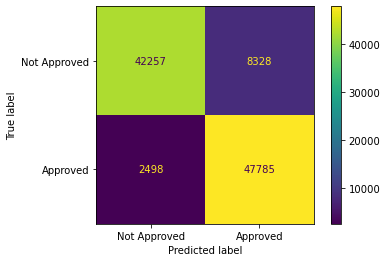

In [7]:
y_pred = model_cb.predict(X_test)
plot_confusion_matrix(model_cb, X_test, Y_test, values_format ='d', display_labels = ['Not Approved','Approved'])

In [9]:
#Best score
print(model_cb.best_score_)

#Classification report
print(classification_report(Y_test, y_pred))

{'learn': {'Logloss': 0.3004466572233672}, 'validation': {'Logloss': 0.35148870597877696, 'AUC': 0.9589961623772657}}
              precision    recall  f1-score   support

           0       0.94      0.84      0.89     50585
           1       0.85      0.95      0.90     50283

    accuracy                           0.89    100868
   macro avg       0.90      0.89      0.89    100868
weighted avg       0.90      0.89      0.89    100868



In [10]:
print(accuracy_score(Y_test,y_pred))

0.892671610421541


### ROC Curve plot

/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


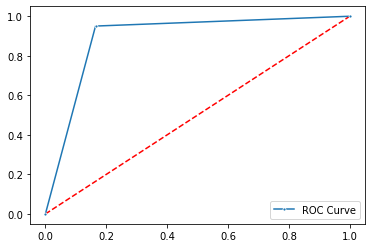

In [12]:
probs = model_cb.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
sns.lineplot([0,1],[0,1], color='red', linestyle='--')
plt = sns.lineplot(fpr, tpr, marker = '.',label='ROC Curve')